# Capstone Project 1: Evaluation:

## Linear Regression

In [39]:
# Import libraries:
import pandas as pd #for building pandas dataframes for analysis
import numpy as np #fundamental package for scientific computing with Python

# Plotting/Visualizations:
import seaborn as sns #for neat visualizations
import matplotlib.pyplot as plt #for visualizations
import datetime
import pylab as P

# Classical Stats Modeling:
import statsmodels.api as sm #provides estimation of many different statistical models, tests and data exploration 
import scipy.stats as stats #large number of probability distributions and statistical functions

# Supervised Learning:
from sklearn.model_selection import train_test_split #for performing train test split analysis
from sklearn.linear_model import LinearRegression #for performing linear regression
from sklearn.metrics import r2_score # Calculte R^2
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [40]:
#Cleaned Data w/o Accommodates
filtered_result4 = pd.read_csv('/Users/carolinerosefrensko/Downloads/data_wrangling_json/AirBNB_cleaned_dataChicagoprice2018-07-20.csv')
filtered_result4.head()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
0,3.0,2.0,5.0,98.0,186,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,4.0,4.5,296.0,46,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,3.0,5.0,108.0,50,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,4.0,4.5,217.0,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1.0,4.5,433.0,34,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
filtered_result4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90355 entries, 0 to 90354
Columns: 197 entries, bedrooms to neighborhood_Wrigleyville
dtypes: float64(4), int64(193)
memory usage: 135.8 MB


In [42]:
filtered_result4.describe()

,bedrooms,minstay,overall_satisfaction,price,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,...,90355.00000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000,90355.000000
mean,1.284655,1.601561,4.763306,113.129910,27.231111,0.569465,0.394677,0.035859,0.011455,0.005423,...,0.00010,0.009673,0.037917,0.001760,0.024758,0.000022,0.004814,0.000166,0.009640,0.011278
std,0.750933,5.301876,0.348055,75.677914,35.624350,0.495154,0.488784,0.185938,0.106413,0.073442,...,0.00998,0.097875,0.190997,0.041912,0.155387,0.004705,0.069219,0.012884,0.097708,0.105597
min,0.000000,1.000000,0.000000,10.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.500000,63.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,95.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,5.000000,140.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,365.000000,5.000000,500.000000,427.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regression

#### Fit the Model

Here,
$Y$ = overall_satisfaction (called "target" data in python, and referred to as the dependent variable or response variable)
and
$X$ = all the other features (or independent variables, predictors or explanatory variables)
which we will use to fit a linear regression model and predict overall satisfaction.

In [43]:
#Filtering out Price Column out of X
X = filtered_result4.drop('price', axis = 1)
names = filtered_result4.drop('price', axis = 1).columns

#Overall_Satisfaction Column
Y = filtered_result4.price

#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state= 42)

# This Creates a LinearRegression Object
lm = LinearRegression()

print("X Train Shape: " + str (X_train.shape))
print("X Test Shape: " + str (X_test.shape))
print("Y Train Shape: " + str (y_train.shape))
print("X Test Shape: " + str (y_test.shape))

#Normalize
#X = preprocessing.StandardScaler().fit_transform(X)
models = []

#Fitting Linear Regression using Sklearn
model = lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

# mean of prices
mean = np.mean(filtered_result4.price)

# standard deviation to compare 
std = np.std(filtered_result4.price)

print("mean: " + str(mean))
print ("standard deviation: " + str(std))

X Train Shape: (72284, 196)
X Test Shape: (18071, 196)
Y Train Shape: (72284,)
X Test Shape: (18071,)
mean: 113.12990980023241
standard deviation: 75.6774948619772


#### Evaluating the Model: Sum of Squares

Linear Regression R squared Train Set: 0.5278
Linear Regression Root Mean Squared Error Train Set: 51.7831
Linear Regression MAE Train Set: 34.8749
Linear Regression R squared Test Set: 0.5218
Linear Regression Root Mean Squared Error Test Set: 53.2029
Linear Regression MAE Test Set: 35.5648


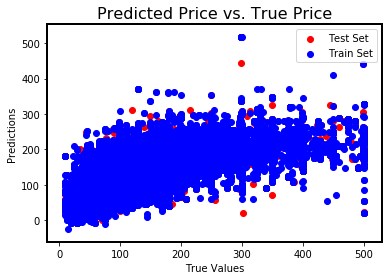

In [44]:
#R^2: Coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, 
#as the proportion of total variation of outcomes explained by the model. 
print('Linear Regression R squared Train Set: %.4f' % model.score(X_train, y_train))

lin_mse = mean_squared_error(y_train, y_pred_train)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression Root Mean Squared Error Train Set: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred_train, y_train)
print('Linear Regression MAE Train Set: %.4f' % lin_mae)

#R^2: Coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, 
#as the proportion of total variation of outcomes explained by the model. 
print('Linear Regression R squared Test Set: %.4f' % model.score(X_test, y_test))

lin_mse = mean_squared_error(y_test, y_pred_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression Root Mean Squared Error Test Set: %.4f' % lin_rmse)

lin_mae = mean_absolute_error(y_pred_test, y_test)
print('Linear Regression MAE Test Set: %.4f' % lin_mae)

## The line / model
plt.scatter(y_test, y_pred_test, color='red',
    label="Test Set")
plt.scatter(y_train, y_pred_train, color='blue',
    label="Train Set")
    
plt.legend()

plt.title("Predicted Price vs. True Price", fontsize=16)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#### Predicted Price for Test Set

In [45]:
# first five predicted prices
lm.predict(X_test)[0:5]

array([ 149.64355469,   55.5925293 ,  254.99731445,   82.33081055,
         91.01733398])

#### Histogram of Predicted Price for Test Set

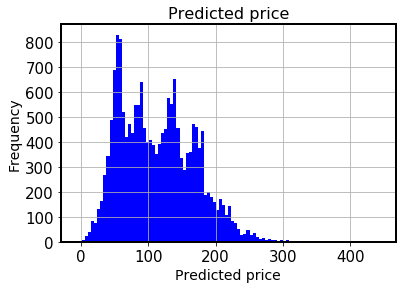

Mean predicted price: 113.017640415
Standard deviation of price: 54.8081744258


In [46]:
plt.hist(lm.predict(X_test), 100, facecolor='blue', align='mid')
plt.title("Predicted price", fontsize=16)
P.rc("axes", linewidth=2.0)
P.rc("lines", markeredgewidth=2.0) 
plt.xlabel('Predicted price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
P.xticks(fontsize=15)
P.yticks(fontsize=15)
plt.grid(True)
plt.savefig('PredictPrice_histogram.eps', facecolor='b', edgecolor='b', format='eps')
plt.show()
print('Mean predicted price:', np.mean(lm.predict(X)))
print('Standard deviation of price:', np.std(lm.predict(X)))


The predicted price follow a pretty normal distribution skewed to the right (mean of 112.50 and a standard deviation of 54.18).

#### Residual Plot of Train (Blue) and Test (Green) Sets

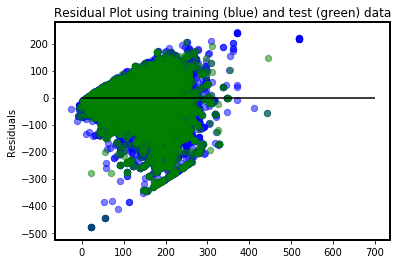

In [47]:
plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, c='g', s=40, alpha=0.5)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.hlines(y=0, xmin=0, xmax=700)
plt.ylabel('Residuals')
plt.show()

Residual plots are a good way to visualize the errors in data. If it is accurate the data should be randomly scattered around line zero. In this case there are a few points outside of the data. This means the model is not capturing something. Maybe there is a interaction between 2 variables not considered, or maybe there is measurement of time dependent data. I will need to check the model parameters.

##### Histogram of the Residual Error of the Test Set

In [48]:
residual_error= y_pred_test-y_test
error_mean = np.mean(residual_error)
error_sigma = np.std(residual_error)

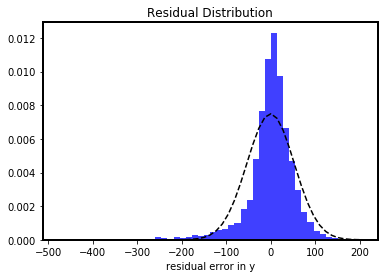

In [49]:
n, bins, patches = plt.hist(residual_error, 50, normed=1, facecolor='blue', alpha=0.75)
y_pdf = P.normpdf( bins, error_mean, error_sigma)
l = P.plot(bins, y_pdf, 'k--', linewidth=1.5)
plt.xlabel("residual error in y")
plt.title("Residual Distribution")
plt.show()

The residual error is mostly normally distributed and centered around zero. 

In [50]:
residual_error.describe()

count    18071.000000
mean        -0.561742
std         53.201412
min       -478.293457
25%        -19.336914
50%          4.634277
75%         27.628418
max        205.545166
Name: price, dtype: float64

In [51]:
def percent_within_x(y_pred_test, y_test, x):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    tmp = []
    for num in err_arr:
        if np.abs(num) < x:
            tmp.append(num)
    return 100.*(len(tmp)/float(len(err_arr)))

def median_error(y_pred_test, y_test):
    err_arr = 100.*(y_pred_test-y_test)/y_test
    return np.median(np.abs(err_arr))

def print_percents(y_pred_test, y_true):
    print ('Percent within 5 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 5)))
    print ('Percent within 10 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 10)))
    print ('Percent within 20 of price: %0.3f' %(percent_within_x(y_pred_test, y_true, 20)))
    print('')
    print ('Median error (percent): %0.3f' %(median_error(y_pred_test, y_true)))
    print('')

In [52]:
print(print_percents(y_pred_test, y_test))

Percent within 5 of price: 10.038
Percent within 10 of price: 20.198
Percent within 20 of price: 40.468

Median error (percent): 25.398

None


#### Probability Plot with Adjusted Values

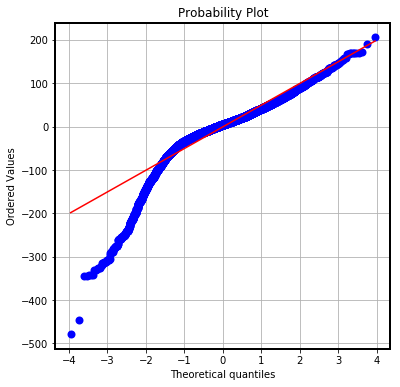

In [53]:
from scipy.stats import probplot
residual_error= y_pred_test-y_test
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
_ = probplot((residual_error), plot=ax)

plt.grid(True)
plt.show()

This chart demonstrates that the residuals are not normal, especially at either end. The data shows more extreme values than expected for a normal distribution. The extreme values should be removed or another model should be used. The advantage of the fitted vs. residual plot is that the model how it performs on each individual case. The advantage of the quantile plot is that it summarizes the model's performance and shows how close the residuals are to a normal distribution.
Outliers are seen forming a group in the upper right side of the fitted vs. residuals plot. These outliers are also seen in the upper right side of the quantile plot.

In [54]:
fits = y_pred_test
resids = residual_error
highresids = residual_error > 200  # outliers from quantile plot
lowresids = residual_error <-100
X_test[highresids]

,bedrooms,minstay,overall_satisfaction,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Arcadia Terrace,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
410,4.0,1.0,4.0,25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_test[lowresids].head()

,bedrooms,minstay,overall_satisfaction,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Arcadia Terrace,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
73874,1.0,1.0,4.5,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50682,2.0,1.0,4.5,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
86380,2.0,1.0,4.5,12,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73381,1.0,1.0,5.0,13,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78267,3.0,1.0,5.0,61,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [56]:
X_test.describe()

,bedrooms,minstay,overall_satisfaction,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Arcadia Terrace,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,...,18071.000000,18071.000000,18071.000000,18071.000000,18071.000000,18071.0,18071.000000,18071.000000,18071.000000,18071.000000
mean,1.292402,1.612805,4.761607,26.957335,0.576227,0.387472,0.036301,0.011012,0.005700,0.001605,...,0.000055,0.010569,0.036191,0.001328,0.025289,0.0,0.005478,0.000055,0.009297,0.010735
std,0.756267,5.872694,0.348648,34.713312,0.494169,0.487186,0.187044,0.104362,0.075283,0.040029,...,0.007439,0.102266,0.186769,0.036420,0.157006,0.0,0.073815,0.007439,0.095973,0.103057
min,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.500000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,5.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,5.000000,32.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,9.000000,365.000000,5.000000,427.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [57]:
X_test[highresids].describe() #Outliers

,bedrooms,minstay,overall_satisfaction,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Arcadia Terrace,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,4.0,1.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,1.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.0,1.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.0,1.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,4.0,1.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.0,1.0,4.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
y_test[highresids][0:20]

410    44.0
Name: price, dtype: float64

In [59]:
X_test[lowresids].describe() #Outliers

,bedrooms,minstay,overall_satisfaction,reviews,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighborhood_Albany Park,neighborhood_Andersonville,neighborhood_Arcadia Terrace,...,neighborhood_West Pullman,neighborhood_West Rogers Park,neighborhood_West Town,neighborhood_West Woodlawn,neighborhood_Wicker Park,neighborhood_Wildwood,neighborhood_Woodlawn,neighborhood_Wrightwood,neighborhood_Wrightwood Neighbors,neighborhood_Wrigleyville
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.0,...,811.0,811.000000,811.000000,811.0,811.000000,811.0,811.0,811.0,811.000000,811.000000
mean,1.949445,1.665845,4.782367,16.510481,0.934649,0.059186,0.006165,0.002466,0.002466,0.0,...,0.0,0.002466,0.035758,0.0,0.032059,0.0,0.0,0.0,0.012330,0.030826
std,1.014054,2.064528,0.363178,19.507411,0.247297,0.236118,0.078325,0.049629,0.049629,0.0,...,0.0,0.049629,0.185802,0.0,0.176266,0.0,0.0,0.0,0.110424,0.172953
min,0.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,1.000000,1.000000,4.500000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,2.000000,1.000000,5.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,3.000000,2.000000,5.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
max,5.000000,30.000000,5.000000,158.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,0.0,1.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000


In [60]:
y_test[lowresids][0:20]

73874    250.0
50682    375.0
86380    499.0
73381    429.0
78267    425.0
21729    200.0
80550    300.0
45599    225.0
86175    300.0
73457    350.0
50441    400.0
81922    399.0
73368    499.0
21738    349.0
73607    347.0
86244    259.0
85944    302.0
58621    260.0
73550    260.0
50136    300.0
Name: price, dtype: float64

In [61]:
#identify neighborhoods of residuals above 210
data = X_test[highresids]
df1 = data.loc[:, data.columns.str.startswith('neighborhood')]
df2 = df1.loc[df1.eq(1).any(1), df1.eq(1).any(0)]
df2

,neighborhood_Near West Side
410,1
